In [1]:
import pandas as pd
import numpy as np


In [2]:
df= pd.read_csv(r"C:\Users\nani siripurapu\Downloads\Telecom_Customer_Churn_Dataset.csv")

In [3]:
df.head()

,CustomerID,Tenure_Months,Monthly_Charges,Total_Charges,Contract_Type,Internet_Service,Payment_Method,Churn
0,CUST00001,52,1541.42,75408.44,Two Year,No,UPI,No
1,CUST00002,15,1317.97,73419.49,Month-to-Month,DSL,Bank Transfer,No
2,CUST00003,61,409.64,87681.15,Month-to-Month,No,Credit Card,No
3,CUST00004,21,1791.31,72417.07,Two Year,DSL,Bank Transfer,No
4,CUST00005,24,1791.34,23568.21,One Year,Fiber Optic,Debit Card,No


REMOVING ALL DUPLICATES VALUES AND NULL VALUES

In [5]:
df = df.drop_duplicates()

In [6]:
a = df.dropna()

FEATURE SCALING

In [8]:
a = df.select_dtypes(include= np.number)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
a = StandardScaler() .fit_transform(a)

In [11]:
b=pd.DataFrame(a,columns=['Tenure_Months','Monthly_Charges','Total_Charges'])

In [12]:
b

,Tenure_Months,Monthly_Charges,Total_Charges
0,0.824853,0.795057,0.891582
1,-0.982193,0.339162,0.822047
2,1.264404,-1.514061,1.320641
3,-0.689158,1.304896,0.787002
4,-0.542641,1.304957,-0.920776
...,...,...,...
2495,-0.103089,-1.372162,-0.839583
2496,0.824853,0.183144,1.258993
2497,-1.031032,0.041469,0.173404
2498,0.873692,-0.761759,0.253710


ENCODING

In [13]:
c=df.select_dtypes(include=['object'])

In [20]:
d=c.drop("CustomerID",axis=1)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [23]:
for i in d:
    d[i] = LabelEncoder().fit_transform(c[i])
    


In [24]:
d.head()

,Contract_Type,Internet_Service,Payment_Method,Churn
0,2,2,3,0
1,0,0,0,0
2,0,2,1,0
3,2,0,0,0
4,1,1,2,0


COMBINING THE NUMERICAL COLUMNS AND CATEGORICAL COLUMNS

In [25]:
df1= pd.concat([b,c],axis=1)

In [26]:
df1.head()

,Tenure_Months,Monthly_Charges,Total_Charges,CustomerID,Contract_Type,Internet_Service,Payment_Method,Churn
0,0.824853,0.795057,0.891582,0,2,2,3,0
1,-0.982193,0.339162,0.822047,1,0,0,0,0
2,1.264404,-1.514061,1.320641,2,0,2,1,0
3,-0.689158,1.304896,0.787002,3,2,0,0,0
4,-0.542641,1.304957,-0.920776,4,1,1,2,0


DEFINING THE TARGET AND FEATURE

In [27]:
y=df1["Churn"]
x=df1.drop("Churn",axis=1)

In [28]:
x.head()

,Tenure_Months,Monthly_Charges,Total_Charges,CustomerID,Contract_Type,Internet_Service,Payment_Method
0,0.824853,0.795057,0.891582,0,2,2,3
1,-0.982193,0.339162,0.822047,1,0,0,0
2,1.264404,-1.514061,1.320641,2,0,2,1
3,-0.689158,1.304896,0.787002,3,2,0,0
4,-0.542641,1.304957,-0.920776,4,1,1,2


TRAIN TEST SPLIT

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

MODEL DEPLOYMENT

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model=LogisticRegression()
model.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

PREDICTED VALUES

In [35]:
y_pred=model.predict(x_test)

METRICS

In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [37]:
accuracy_score(y_test,y_pred)

0.768

In [40]:
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       384
           1       0.00      0.00      0.00       116

    accuracy                           0.77       500
   macro avg       0.38      0.50      0.43       500
weighted avg       0.59      0.77      0.67       500



In [41]:
confusion_matrix(y_test,y_pred)

array([[384,   0],
       [116,   0]])

In [42]:
accuracy=384/500

In [43]:
accuracy

0.768

FINAL INSIGHT

In [44]:
model.coef_[0]

array([-2.54174014e-02, -6.87033242e-02, -1.21813591e-01,  1.70388556e-05,
       -3.87485061e-02,  6.89613359e-02, -9.16344670e-02])

In [45]:
x.columns

Index(['Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'CustomerID',
       'Contract_Type', 'Internet_Service', 'Payment_Method'],
      dtype='object')

In [46]:
import matplotlib.pyplot as plt

<BarContainer object of 7 artists>

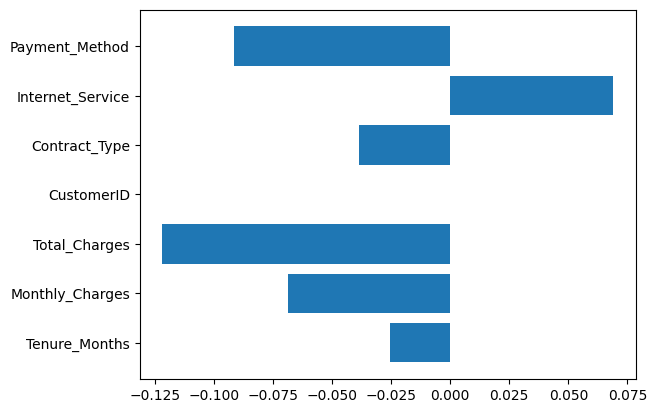

In [47]:
plt.barh(x.columns,model.coef_[0])

THE MAIN REASON BEHIND CUSTOMER CHURN WAS THE INTERNET SERVICE